In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# age 

In [4]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

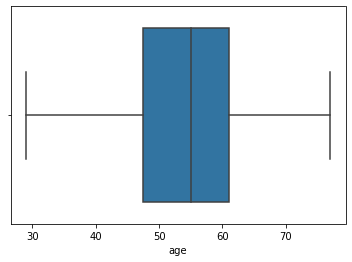

In [5]:
sns.boxplot(x=df['age'])

# sex

In [6]:
df['sex'].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

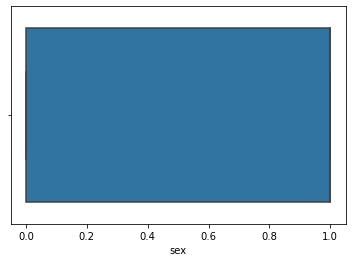

In [8]:
sns.boxplot(x=df['sex'])

# cp 

In [9]:
df['sex'].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [10]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp'>

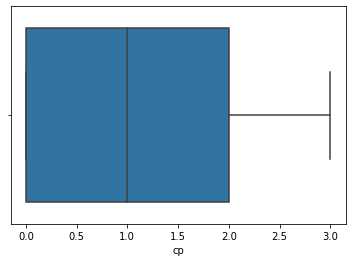

In [11]:
sns.boxplot(x=df['cp'])

# trestbps 

In [12]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

<AxesSubplot:xlabel='trestbps'>

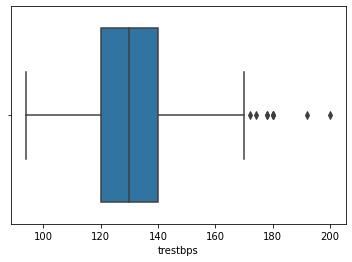

In [13]:
sns.boxplot(x=df['trestbps'])

In [14]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [15]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)

IQR = q3-q1

upper_limit = q3 + 3*IQR
lower_limit = q1 - 3*IQR

In [16]:
upper_limit

200.0

# chol

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 6.fbs

In [19]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [20]:
#df.info()

# 7. restecg

In [21]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [22]:
#df.info()

# 8.thalach

In [23]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

<AxesSubplot:xlabel='thalach'>

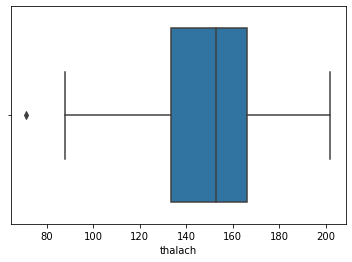

In [24]:
sns.boxplot(df['thalach'])

In [25]:
q1 = df['thalach'].quantile(0.25)
q3 = df['thalach'].quantile(0.75)

IQR = q3-q1
lower_limit = q1 - 1.5*IQR
lower_limit

84.75

In [26]:
df.loc[(df['thalach']<lower_limit),'thalach']=lower_limit

<AxesSubplot:xlabel='thalach'>

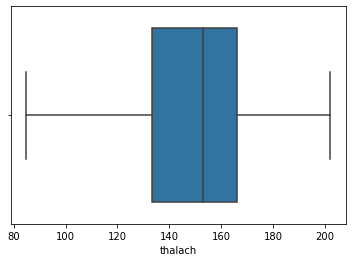

In [27]:
# after rem out
sns.boxplot(df['thalach'])

In [28]:
#df.info()

# 9.exang

In [29]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


# oldpeak

<AxesSubplot:xlabel='oldpeak'>

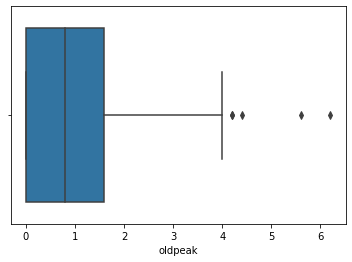

In [31]:
sns.boxplot(df['oldpeak'])

In [32]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75)

IQR = q3-q1
lower_limit = q1 - 1.5*IQR
upper_limit =q3+1.5*IQR
upper_limit


4.0

In [33]:
df['oldpeak'].loc[df['oldpeak']>upper_limit]

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

In [34]:
df.loc[(df['oldpeak']>upper_limit),'oldpeak']=upper_limit

<AxesSubplot:xlabel='oldpeak'>

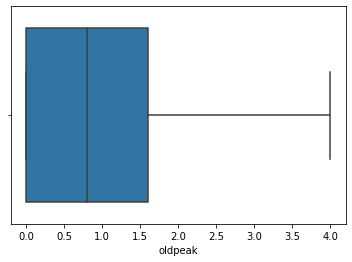

In [35]:
sns.boxplot(df['oldpeak'])

In [36]:
# df.info()

# slope

<AxesSubplot:xlabel='slope'>

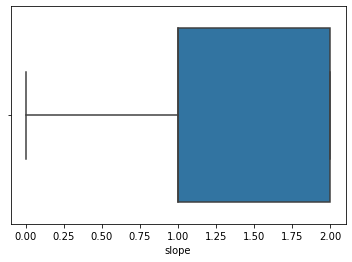

In [37]:
sns.boxplot(df['slope'])

# ca

<AxesSubplot:xlabel='ca'>

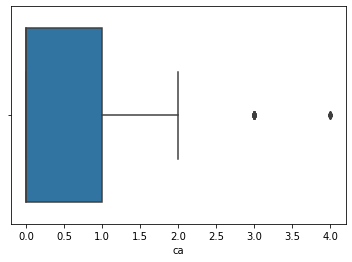

In [38]:
sns.boxplot(df['ca'])

In [39]:
q1 = df['ca'].quantile(0.25)
q3 = df['ca'].quantile(0.75)

IQR = q3-q1
lower_limit = q1 - 1.5*IQR
upper_limit =q3+1.5*IQR
upper_limit


2.5

In [40]:
df['ca'].loc[df['ca']>upper_limit]

52     3
92     4
97     3
99     3
158    4
163    4
164    4
165    3
181    3
191    3
204    3
208    3
217    3
220    3
231    3
234    3
238    3
247    3
249    3
250    3
251    4
252    3
255    3
267    3
291    3
Name: ca, dtype: int64

In [41]:
df.loc[(df['ca']>upper_limit),'ca']=upper_limit

In [42]:
# df.info()

# thal

<AxesSubplot:xlabel='thal'>

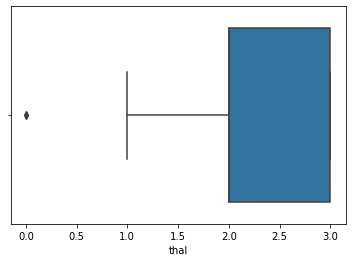

In [43]:
sns.boxplot(df['thal'])

In [44]:
q1 = df['thal'].quantile(0.25)
q3 = df['thal'].quantile(0.75)

IQR = q3-q1
lower_limit = q1 - 1.5*IQR
upper_limit =q3+1.5*IQR
lower_limit

0.5

In [45]:
df['thal'].loc[df['thal']<lower_limit]

48     0
281    0
Name: thal, dtype: int64

In [46]:
df.loc[(df['thal']<lower_limit),'thal']=lower_limit

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,classification_report,confusion_matrix,accuracy_score

In [48]:
x=df.drop('target',axis=1)
y=df['target']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
#testing
y_pred = dt_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
accu_score = accuracy_score(y_test,y_pred)
clf_report = classification_report(y_test,y_pred)
print("confusion matrix \n",cnf_matrix)
print("accuracy score \n",accu_score)
print("classification report \n",clf_report)

confusion matrix 
 [[35  9]
 [ 7 40]]
accuracy score 
 0.8241758241758241
classification report 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [52]:
#training

y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
accu_score = accuracy_score(y_train,y_pred_train)
clf_report = classification_report(y_train,y_pred_train)
print("confusion matrix \n",cnf_matrix)
print("accuracy score \n",accu_score)
print("classification report \n",clf_report)

confusion matrix 
 [[ 94   0]
 [  0 118]]
accuracy score 
 1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [53]:
hyp = {"criterion" : ['gini','entropy'],
"max_depth" : np.arange(3,15),
"min_samples_split" : np.arange(2,20),
"min_samples_leaf" : np.arange(2,10)}
dt_clf = DecisionTreeClassifier()

gscv_dt_clf = GridSearchCV(dt_clf, hyp, cv = 5)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [54]:
dt_model_gscv = gscv_dt_clf.best_estimator_
dt_model_gscv.fit(x_train, y_train)

## Testing Data Accuracy
y_pred = dt_model_gscv.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score_test = accuracy_score(y_test, y_pred)
print("Accuracy Score :",acc_score_test)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[33 11]
 [12 35]]
Accuracy Score : 0.7472527472527473
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        44
           1       0.76      0.74      0.75        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [55]:
## Training Data Accuracy

y_pred_train = dt_model_gscv.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :",acc_score_train)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 82  12]
 [ 14 104]]
Accuracy Score : 0.8773584905660378
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        94
           1       0.90      0.88      0.89       118

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



In [56]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
result = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']

In [58]:
train_data_accuracy = []
test_data_accuracy = []

for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy = dt_clf.score(x_train, y_train)
    train_data_accuracy.append(train_accuracy)
    test_accuracy = dt_clf.score(x_test, y_test)
    test_data_accuracy.append(test_accuracy)
    
    print("ccp_alpha      :",ccp_alpha)
    print('train_accuracy :',train_accuracy)
    print("Test Accuracy  :",test_accuracy)
    print("*"*80)

ccp_alpha      : 0.0
train_accuracy : 1.0
Test Accuracy  : 0.8131868131868132
********************************************************************************
ccp_alpha      : 0.00404312668463612
train_accuracy : 0.9952830188679245
Test Accuracy  : 0.8131868131868132
********************************************************************************
ccp_alpha      : 0.004645511720983412
train_accuracy : 0.9905660377358491
Test Accuracy  : 0.8131868131868132
********************************************************************************
ccp_alpha      : 0.006064690026954176
train_accuracy : 0.9858490566037735
Test Accuracy  : 0.8351648351648352
********************************************************************************
ccp_alpha      : 0.006289308176100628
train_accuracy : 0.9669811320754716
Test Accuracy  : 0.8131868131868132
********************************************************************************
ccp_alpha      : 0.006289308176100628
train_accuracy : 0.9669811320754716
Test

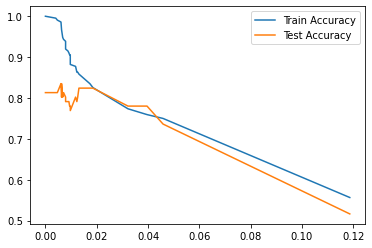

In [59]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_data_accuracy,label = "Train Accuracy")
ax.plot(ccp_alpha_list,test_data_accuracy, label = "Test Accuracy")
ax.legend()

In [60]:
dt_clf_prunning = DecisionTreeClassifier(ccp_alpha=0.017349815658208638)
dt_clf_prunning.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.017349815658208638)

In [61]:

train_score=dt_clf_prunning.score(x_train, y_train)
test_score=dt_clf_prunning.score(x_test, y_test)
print("training accuracy is =",train_score)
print("testing score is =",test_score)

training accuracy is = 0.8349056603773585
testing score is = 0.8241758241758241


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(random_state=20)
rf_model.fit(x_train, y_train)
rf_model.score(x_train, y_train)

rf_model.score(x_test, y_test)

0.8131868131868132

In [64]:
rf_model = RandomForestClassifier()

hyp= {
    "n_estimators" :np.arange(10,200,10),
    "criterion" : ['gini','entropy'],
    "max_depth" : np.arange(2,10),
    "min_samples_split": np.arange(2,20),
    "min_samples_leaf": np.arange(2,15)
}
rscv_rf_clf = RandomizedSearchCV(rf_model,hyp, cv =5)

rscv_rf_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [65]:
rf_model_hyp = rscv_rf_clf.best_estimator_
rf_model_hyp.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=13, min_samples_split=5,
                       n_estimators=110)

In [66]:
# Train Data Accuracy

y_pred_train = rf_model_hyp.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy Score :\n', acc_score)

clf_report = classification_report(y_train, y_pred_train)

Confusion Matrix :
 [[ 74  20]
 [  7 111]]
Accuracy Score :
 0.8726415094339622


In [67]:
# Test Data Accuracy

y_pred = rf_model_hyp.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score :\n', acc_score)

clf_report = classification_report(y_test, y_pred)

Confusion Matrix :
 [[32 12]
 [ 5 42]]
Accuracy Score :
 0.8131868131868132


<AxesSubplot:>

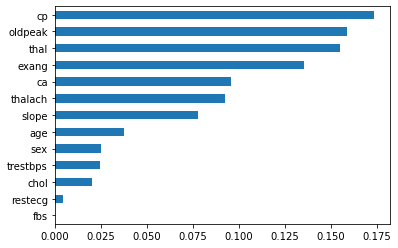

In [68]:
array = rf_model_hyp.feature_importances_

s1 = pd.Series(array)
s1.index = x.columns
s1.sort_values().plot(kind = 'barh')


In [69]:
# decision tree with hyp tunning:
#     testing>>>Accuracy Score :0.7472527472527473
#     training>>Accuracy Score : 0.8773584905660378
        
# decision tree with prunning:
#     training accuracy is = 0.8349056603773585
#     testing score is = 0.8241758241758241
    
# random forest:
#     training>>Accuracy Score :0.9056603773584906
#     testing>>Accuracy Score  :0.8571428571428571

In [70]:
import pickle
file_name='rf_modl.pkl'
f = open(file_name,'wb')
pickle.dump(rf_model_hyp,f)
f.close()

In [71]:
import pickle
file_name='DT_modl_prune.pkl'
f = open(file_name,'wb')
pickle.dump(dt_clf_prunning,f)
f.close()